In [29]:
# Read and display an image in opencv
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tyrion_image = cv2.imread('../data/tyrion.jpg', 0)

# Draw the image and show the matrix
print(tyrion_image[:10, :10])
plt.show()
print(tyrion_image[0][0])

[[194 194 192 195 193 191 191 190 190 188]
 [192 194 190 194 188 191 189 190 190 190]
 [191 191 191 191 191 190 190 188 189 188]
 [192 192 191 192 190 190 190 190 190 188]
 [192 191 189 190 191 189 189 188 188 189]
 [191 192 189 190 188 188 188 189 188 188]
 [191 191 191 189 191 188 189 188 190 189]
 [191 191 190 190 187 189 187 189 188 190]
 [192 190 189 189 188 188 187 190 189 190]
 [192 190 190 189 188 189 188 188 189 189]]
194


Red ->
 [[209 209 210 211 212 213 214 214 215 216]
 [208 209 210 211 212 213 213 214 215 215]
 [208 208 209 210 211 212 212 213 214 214]
 [207 207 208 209 210 211 212 212 213 214]
 [206 206 207 208 209 210 211 211 212 213]
 [208 208 209 210 211 212 213 213 214 215]
 [208 208 209 210 211 212 213 213 214 215]
 [208 208 209 210 211 212 213 213 214 215]
 [207 208 209 210 211 212 212 213 214 214]
 [207 208 208 209 210 211 212 212 214 214]]


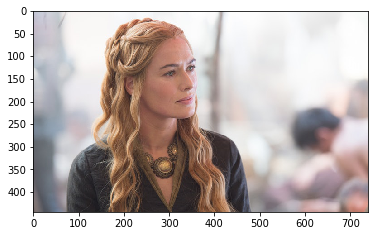

In [11]:
cersei_image = cv2.imread('../data/cersei.jpg')

# Draw the image and show the matrix
print('Red ->\n', cersei_image[:10, :10, 0], )
plt.imshow(cv2.cvtColor(cersei_image, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
# Find the average color of the image
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(cersei_image, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[163 166 180]


## Color component Seperation

To perform the actual color detection using OpenCV, take a look at Line 29 where we use the cv2.inRange function.

The cv2.inRange  function expects three arguments: the first is the image  were we are going to perform color detection, the second is the lower  limit of the color you want to detect, and the third argument is the upper  limit of the color you want to detect.

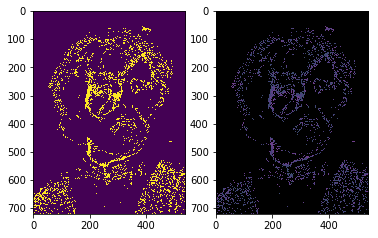

In [15]:
import numpy as np
import cv2
image = cv2.imread('../data/tyrion.jpg')
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blue_lower = np.array([110, 0, 0])
blue_upper = np.array([140, 255, 255])
mask = cv2.inRange(image, blue_lower, blue_upper)
plt.subplot(121)
plt.imshow(mask)
res = cv2.bitwise_and(image, image, mask = mask)
res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
plt.subplot(122)
plt.imshow(res)
plt.show()

#### image thresholding
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = tyrion_image
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

#for img in images:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

[    0     6     0     3     0     0     3     3     6     3    18    21
    24    45    33    72    84   111   117   171   192   180   291   324
   363   396   492   546   603   855   912  1122  1089  1380  1461  1656
  1896  1980  2037  2049  2205  1992  2100  1977  1938  1887  1830  1686
  1803  1854  1659  1827  1770  1698  1689  1647  1776  1785  1833  1938
  1917  2073  2265  2364  2430  2466  2610  2595  2829  2901  2976  3180
  3267  3222  3342  3543  3552  3714  4041  4017  4185  4185  4254  4173
  4299  4206  4134  4209  3981  3966  4143  3876  3726  3819  3690  3840
  3723  3666  3939  3990  4173  4134  4167  4296  4284  4560  4773  4776
  4926  5049  5325  5520  5433  5349  5511  5919  5922  6078  6096  5946
  5961  6015  6153  5958  5769  5610  5817  5673  5277  5409  5157  5088
  4878  4548  4407  4269  4170  4179  4161  4017  3963  3807  3774  3597
  3834  3750  3471  3555  3294  3288  3036  3285  2970  3072  2937  3090
  2766  2583  2577  2604  2340  2418  2313  2304  2

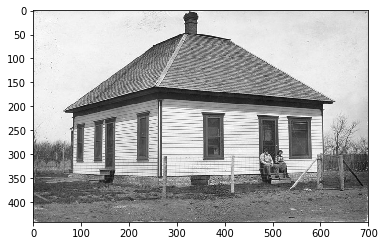

In [16]:
hist_image = cv2.imread('../data/image_processing/histogram.jpg')
hist,bins = np.histogram(hist_image.ravel(),256,[0,256])
plt.imshow(hist_image)
print(hist)
print(bins)
print("image size = "+str(hist_image.shape[0]*hist_image.shape[1]*hist_image.shape[2]))
print("image size = "+str(np.sum(hist)))


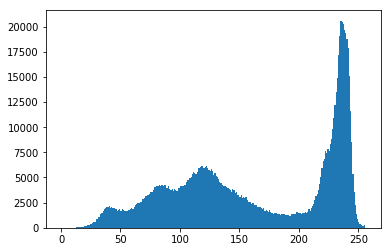

In [17]:
#Plot histogram using matplotlib for a grey scale image
plt.hist(hist_image.ravel(),256,[0,256])
plt.show()

## Plot histogram using matplotlob for color image
function:
    cv2.calcHist(images, channel, mask, histSize, ranges[, hist[, accumulate]])

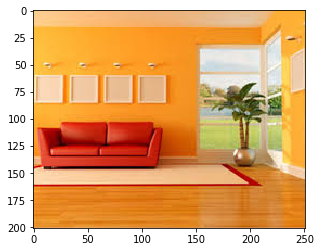

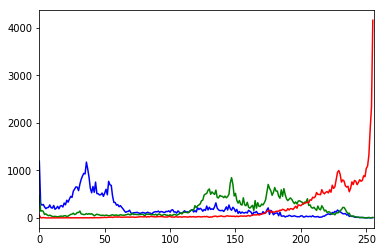

In [18]:
# Plot histogram using matplotlob for color image
hist_image = cv2.imread('../data/image_processing/histogram2.jpeg')
plt.imshow(cv2.cvtColor(hist_image, cv2.COLOR_BGR2RGB))
plt.show()
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([hist_image],[i],None,[256],[0,256])
    plt.plot([n for n in range(histr.shape[0])], histr, color = col)
    plt.xlim([0,256])
plt.show()

## Histogram Equilization
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. 
So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

![histogram_equalization.png](../data/histogram_equalization.png)

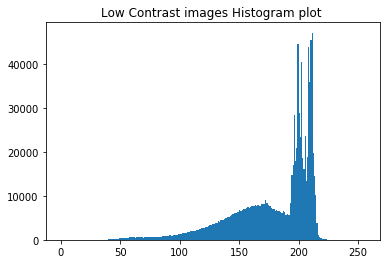

In [19]:
# Histogram equalisation
low_contrst_img = cv2.imread('../data/image_processing/low_contrast3.jpg',0)
plt.hist(low_contrst_img.ravel(),256,[0,256])
plt.title("Low Contrast images Histogram plot ")
plt.show()

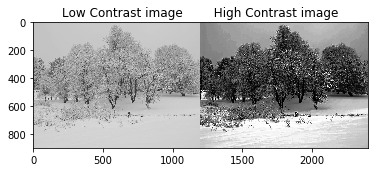

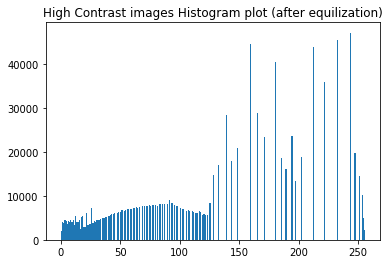

In [20]:
equ = cv2.equalizeHist(low_contrst_img)
res = np.hstack((low_contrst_img,equ))
plt.title("Low Contrast image        High Contrast image")
plt.imshow(res, 'gray')
plt.show()
plt.hist(equ.ravel(),256,[0,256])
plt.title("High Contrast images Histogram plot (after equilization)")
plt.show()

## Contour Detection in images
    
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

### Thresholding 
Thresholding is mainly done inorder to reduce the noise in the image.
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). 
    
#### The function used is cv.threshold().
First argument ---> source image (grayscale image).

Second argument ----> is the threshold value which is used to classify the pixel values.

Third argument ----> maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 
    
OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

#### 1. cv.THRESH_BINARY
#### 2. cv.THRESH_BINARY_INV
#### 3. cv.THRESH_TRUNC
#### 4. cv.THRESH_TOZERO
#### 5. cv.THRESH_TOZERO_INV

#### The above mentioned thresholding can be used in images which donot have much intensity variation ibetween the pixels of the image.

### Adaptive Thresholding

when we use a Global threshold value, it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

#### 1. cv.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
#### 2. cv.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.


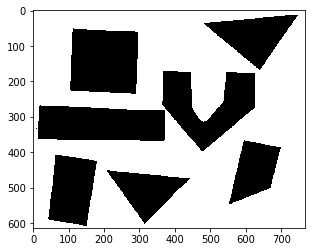

In [21]:
im = cv2.imread('../data/image_processing/shapes.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 220, 255, 0)
plt.imshow(thresh,'gray')
plt.show()

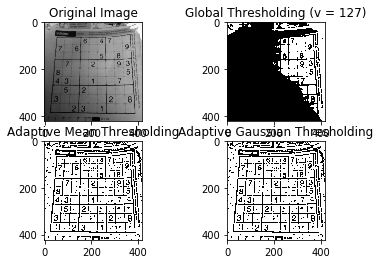

In [22]:
img = cv2.imread('../data/image_processing/sudoku-original.jpg')
img = cv2.medianBlur(img,5)

#since adaptive threshold only workson grayscale image convert the image into gray scale 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,th1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

plt.subplot(221)
plt.imshow(img_gray,'gray')
plt.title(titles[0])


plt.subplot(222)
plt.imshow(th1,'gray')
plt.title(titles[1])


plt.subplot(223)
plt.imshow(th2,'gray')
plt.title(titles[2])

plt.subplot(224)
plt.imshow(th2,'gray')
plt.title(titles[3])


plt.show()


## How to find contours in Opencv

#### function: cv2.findContours()

This function is used to find the contours. 

Normally the above function to detect objects in an image. Sometimes objects are in different locations. But in some cases, some shapes are inside other shapes. Just like nested figures. In this case, we call outer one as parent and inner one as child. This way, contours in an image has some relationship to each other. 

Representation of this relationship is called the Hierarchy.

![hierarchy.png](../data/hierarchy.png)

In this image, there are a few shapes numbered from 0-5. 2 and 2a denotes the external and internal contours of the outermost box.

Here, contours 0,1,2 are external or outermost. We can say, they are in hierarchy-0 or simply they are in same hierarchy level.

Next comes contour-2a. It can be considered as a child of contour-2 (or in opposite way, contour-2 is parent of contour-2a). So let it be in hierarchy-1. Similarly contour-3 is child of contour-2 and it comes in next hierarchy. Finally contours 4,5 are the children of contour-3a, and they come in the last hierarchy level. From the way I numbered the boxes, I would say contour-4 is the first child of contour-3a (It can be contour-5 also).

### Hierarchy Representation in OpenCV

So each contour has its own information regarding what hierarchy it is, who is its child, who is its parent etc. OpenCV represents it as an array of four values : [Next, Previous, First_Child, Parent]

                              *"Next denotes next contour at the same hierarchical level."*

For eg, take contour-0 in our picture. Who is next contour in its same level ? It is contour-1. So simply put Next = 1. Similarly for Contour-1, next is contour-2. So Next = 2.

What about contour-2? There is no next contour in the same level. So simply, put Next = -1. What about contour-4? It is in same level with contour-5. So its next contour is contour-5, so Next = 5.

                            *"Previous denotes previous contour at the same hierarchical level."*

It is same as above. Previous contour of contour-1 is contour-0 in the same level. Similarly for contour-2, it is contour-1. And for contour-0, there is no previous, so put it as -1.

                                       *"First_Child denotes its first child contour."*

There is no need of any explanation. For contour-2, child is contour-2a. So it gets the corresponding index value of contour-2a. What about contour-3a? It has two children. But we take only first child. And it is contour-4. So First_Child = 4 for contour-3a.

                                       *"Parent denotes index of its parent contour."*

It is just opposite of First_Child. Both for contour-4 and contour-5, parent contour is contour-3a. For contour-3a, it is contour-3 and so on.

### Contour Retrieval Mode

#### 1. RETR_LIST

This is the simplest of the four flags (from explanation point of view). It simply retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

So here, 3rd and 4th term in hierarchy array is always -1. But obviously, Next and Previous terms will have their corresponding values. 


#### 2. RETR_EXTERNAL

If you use this flag, it returns only extreme outer flags. All child contours are left behind. We can say, under this law, Only the eldest in every family is taken care of. It doesn't care about other members of the family.

#### 4. RETR_TREE

And this is the final guy, Mr.Perfect. It retrieves all the contours and creates a full family hierarchy list. It even tells, who is the grandpa, father, son, grandson and even beyond.

![tree_hierarchy.png](../data/tree_hierarchy.png)

Take contour-0 : It is in hierarchy-0. Next contour in same hierarchy is contour-7. No previous contours. Child is contour-1. And no parent. So array is [7,-1,1,-1].

Take contour-2 : It is in hierarchy-1. No contour in same level. No previous one. Child is contour-3. Parent is contour-1. So array is [-1,-1,3,1].

and so on

In [23]:
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

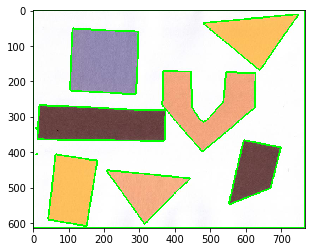

In [24]:
cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

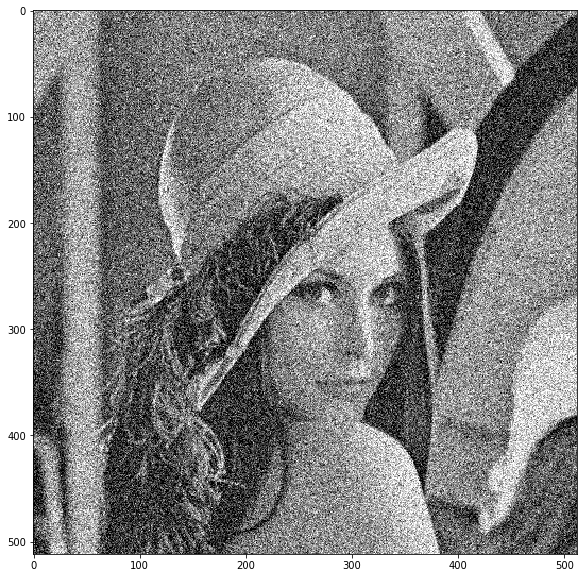

In [25]:
img = cv2.imread('../data/opencv_numpy/lena_noisy.png')
plt.figure(figsize=(10,10))
plt.imshow(img,'gray')

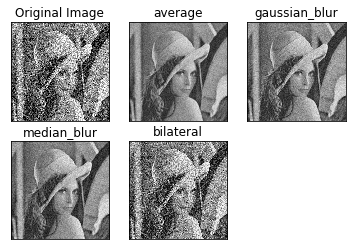

In [26]:
average = cv2.blur(img, (5,5),0)
gaussian_blur = cv2.GaussianBlur(img, (5,5), 0)
median_blur = cv2.medianBlur(img, 5 ,0)
bilateral = cv2.bilateralFilter(img,9,75,75)

titles = ['Original Image','average','gaussian_blur','median_blur','bilateral']
images = [img, average, gaussian_blur, median_blur, bilateral]

#for img in images:
for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

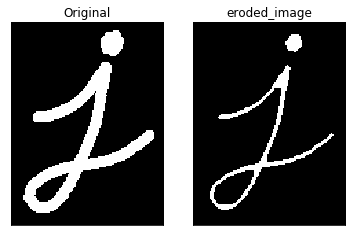

In [27]:
# Now lets do morphological operations
# First lets start with erosion
img1 = cv2.imread('../data/image_processing/j_image.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img1,kernel,iterations = 1)

plt.subplot(1,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(erosion,cmap = 'gray')
plt.title('eroded_image'), plt.xticks([]), plt.yticks([])
plt.show()

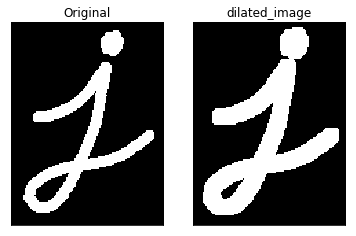

In [23]:
dilation = cv2.dilate(img1,kernel,iterations = 1)

plt.subplot(1,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(dilation,cmap = 'gray')
plt.title('dilated_image'), plt.xticks([]), plt.yticks([])
plt.show()

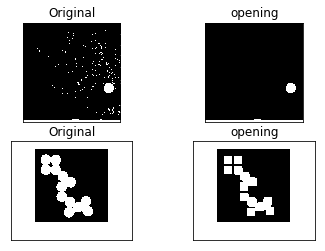

In [17]:
img1 = cv2.imread('../data/image_processing/noisy_img.png',0)
opening1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)

img2 = cv2.imread('../data/image_processing/circles.png',0)
opening2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel,iterations = 6)


plt.subplot(2,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(opening1,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(opening2,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.show()


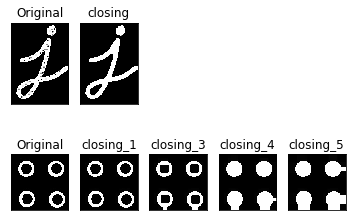

In [18]:
# Now lets try morphological closing

img1 = cv2.imread('../data/image_processing/j_with_holes.png',0)
closing_img1 = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel)

img2 = cv2.imread('../data/image_processing/circle_with_holes.png',0)
closing_img2_iter1 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 1)
closing_img2_iter3 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 3)
closing_img2_iter4 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 4)
closing_img2_iter5 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations = 5)




plt.subplot(2,5,1),plt.imshow(img1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,2),plt.imshow(closing_img1,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,6),plt.imshow(img2,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,7),plt.imshow(closing_img2_iter1,cmap = 'gray')
plt.title('closing_1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,8),plt.imshow(closing_img2_iter3,cmap = 'gray')
plt.title('closing_3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,9),plt.imshow(closing_img2_iter4,cmap = 'gray')
plt.title('closing_4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,5,10),plt.imshow(closing_img2_iter5,cmap = 'gray')
plt.title('closing_5'), plt.xticks([]), plt.yticks([])

plt.show()